In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
np.random.seed(0)

hours_studied = np.random.uniform(0, 10, 100)
prev_score = np.random.uniform(20, 100, 100)

In [54]:
pass_exam = (hours_studied * 0.5 + prev_score * 0.03 + np.random.normal(0, 1, 100)) > 5.5
pass_exam = pass_exam.astype(int)

In [55]:
df = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Previous_Score': prev_score,
    'Pass': pass_exam
})
df.head()

,Hours_Studied,Previous_Score,Pass
0,5.488135,74.225323,1
1,7.151894,41.600638,0
2,6.027634,78.815522,0
3,5.448832,96.975084,0
4,4.236548,39.900251,0


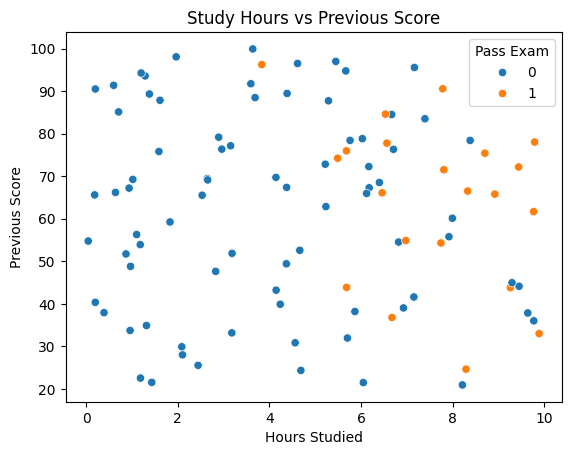

In [56]:
sns.scatterplot(x='Hours_Studied', y='Previous_Score', hue='Pass', data=df)
plt.xlabel('Hours Studied')
plt.ylabel('Previous Score')
plt.title('Study Hours vs Previous Score')
plt.legend(title='Pass Exam')
plt.show()

In [57]:
X = df[['Hours_Studied', 'Previous_Score']]
y = df['Pass']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[14  0]
 [ 4  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.33      0.50         6

    accuracy                           0.80        20
   macro avg       0.89      0.67      0.69        20
weighted avg       0.84      0.80      0.76        20



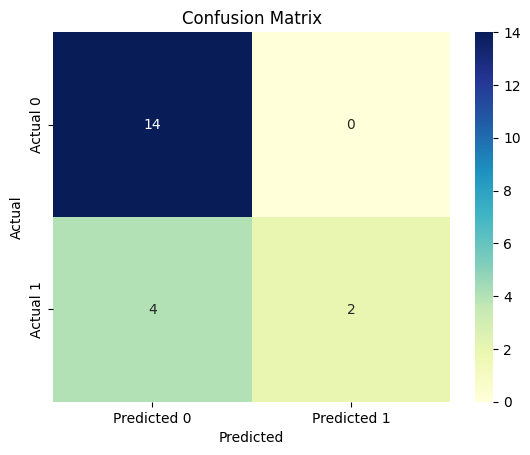

In [63]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
x_min, x_max = X['Hours_Studied'].min() - 1, X['Hours_Studied'].max() + 1
y_min, y_max = X['Previous_Score'].min() - 1, X['Previous_Score'].max() + 1

In [65]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                     np.linspace(y_min, y_max, 200))

In [66]:
# faltten and predict
grid_points = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid_points).reshape(xx.shape)	

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


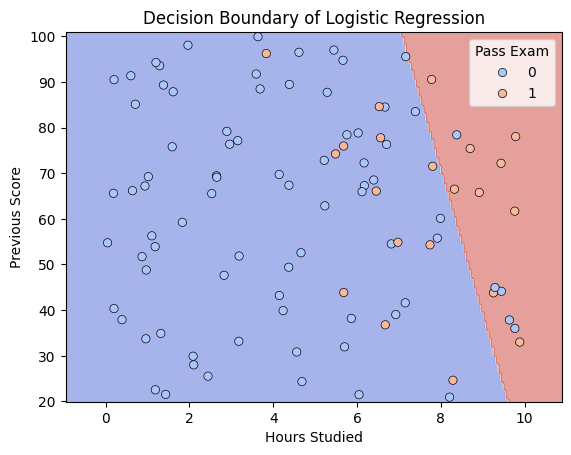

In [67]:
plt.contourf(xx, yy, probs, alpha=0.5, cmap='coolwarm')
sns.scatterplot(x='Hours_Studied', y='Previous_Score', hue='Pass', data=df, palette='coolwarm', edgecolor='k')
plt.xlabel('Hours Studied')
plt.ylabel('Previous Score')
plt.title('Decision Boundary of Logistic Regression')
plt.legend(title='Pass Exam')
plt.show()

In [68]:
# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-7.12364948]
Coefficients: [[0.69701362 0.02189219]]
